# Flower Recognition CNN Keras

In [ ]:
import os


## CONTENTS ::

[ **1 ) Importing Various Modules**](#content1)

[ **2 ) Preparing the Data**](#content2)

[ **3 ) Modelling**](#content3)

[ **4 ) Evaluating the Model Performance**](#content4)

[ **5 ) Visualizing Predictons on the Validation Set**](#content5)

<a id="content1"></a>
## 1 ) Importing Various Modules.

In [ ]:
!pip install seaborn


In [ ]:
pip install scikit-learn


In [ ]:
pip install tensorflow


In [ ]:
pip install numpy pandas matplotlib seaborn scikit-learn keras tensorflow tqdm opencv-python-headless pillow


In [38]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image
#<a id="content2"></a>
## 2 ) Preparing the Data
## 2.1) Making the functions to get the training and validation set from the Images
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='C:\\Users\\Soham\\Desktop\\My_Flowers_Dataset\\All_Flowers\\Daisy'
FLOWER_Dhalia_Pinnata_DIR='C:\\Users\\Soham\\Desktop\\My_Flowers_Dataset\\All_Flowers\\Dhalia Pinnata'
#FLOWER_TULIP_DIR='C:\\Users\\Soham\\Desktop\\My_Flowers_Dataset\\All_Flowers\\tulips'
#FLOWER_Hibiscus_DIR='C:\\Users\\Soham\\Desktop\\My_Flowers_Dataset\\All_Flowers\\Hibiscus'
FLOWER_ROSE_DIR='C:\\Users\\Soham\\Desktop\\My_Flowers_Dataset\\All_Flowers\\Rose'
FLOWER_Surfinia_DIR='C:\\Users\\Soham\\Desktop\\My_Flowers_Dataset\\All_Flowers\\Surfinia'
FLOWER_sunflowers_DIR = 'C:\\Users\\Soham\\Desktop\\My_Flowers_Dataset\\All_Flowers\\sunflowers'
#FLOWER_dandelion_DIR ='C:\\Users\\Soham\\Desktop\\My_Flowers_Dataset\\All_Flowers\\dandelion'
FLOWER_Lilly_DIR ='C:\\Users\\Soham\\Desktop\\My_Flowers_Dataset\\All_Flowers\\Lilly'
FLOWER_Lotus_DIR ='C:\\Users\\Soham\\Desktop\\My_Flowers_Dataset\\All_Flowers\\Lotus'


def assign_label(img,flower_type):
    return flower_type

def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        X.append(np.array(img))
        Z.append(str(label))



make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))
make_train_data('Dhalia_Pinnata',FLOWER_Dhalia_Pinnata_DIR)
print(len(X))
#make_train_data('Hibiscus',FLOWER_Hibiscus_DIR)
#print(len(X))
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))
make_train_data('Surfinia',FLOWER_Surfinia_DIR)
print(len(X))
make_train_data('Lilly',FLOWER_Lilly_DIR)
print(len(X))
make_train_data('Lotus',FLOWER_Lotus_DIR)
print(len(X))
#make_train_data('dandelion',FLOWER_dandelion_DIR)
#print(len(X))

#make_train_data('Tulip',FLOWER_TULIP_DIR)
#print(len(X))
make_train_data('Sunflowers',FLOWER_sunflowers_DIR)
print(len(X))

100%|██████████| 1424/1424 [00:33<00:00, 42.69it/s] 


1424


100%|██████████| 1154/1154 [01:25<00:00, 13.48it/s]


2578


100%|██████████| 1165/1165 [01:16<00:00, 15.20it/s]


3743


100%|██████████| 1000/1000 [00:55<00:00, 18.16it/s]


4743


100%|██████████| 1000/1000 [00:14<00:00, 67.24it/s]


5743


100%|██████████| 1000/1000 [00:15<00:00, 66.64it/s]


6743


100%|██████████| 1673/1673 [00:09<00:00, 172.02it/s]

8416


## 2.2 ) Visualizing some Random Images

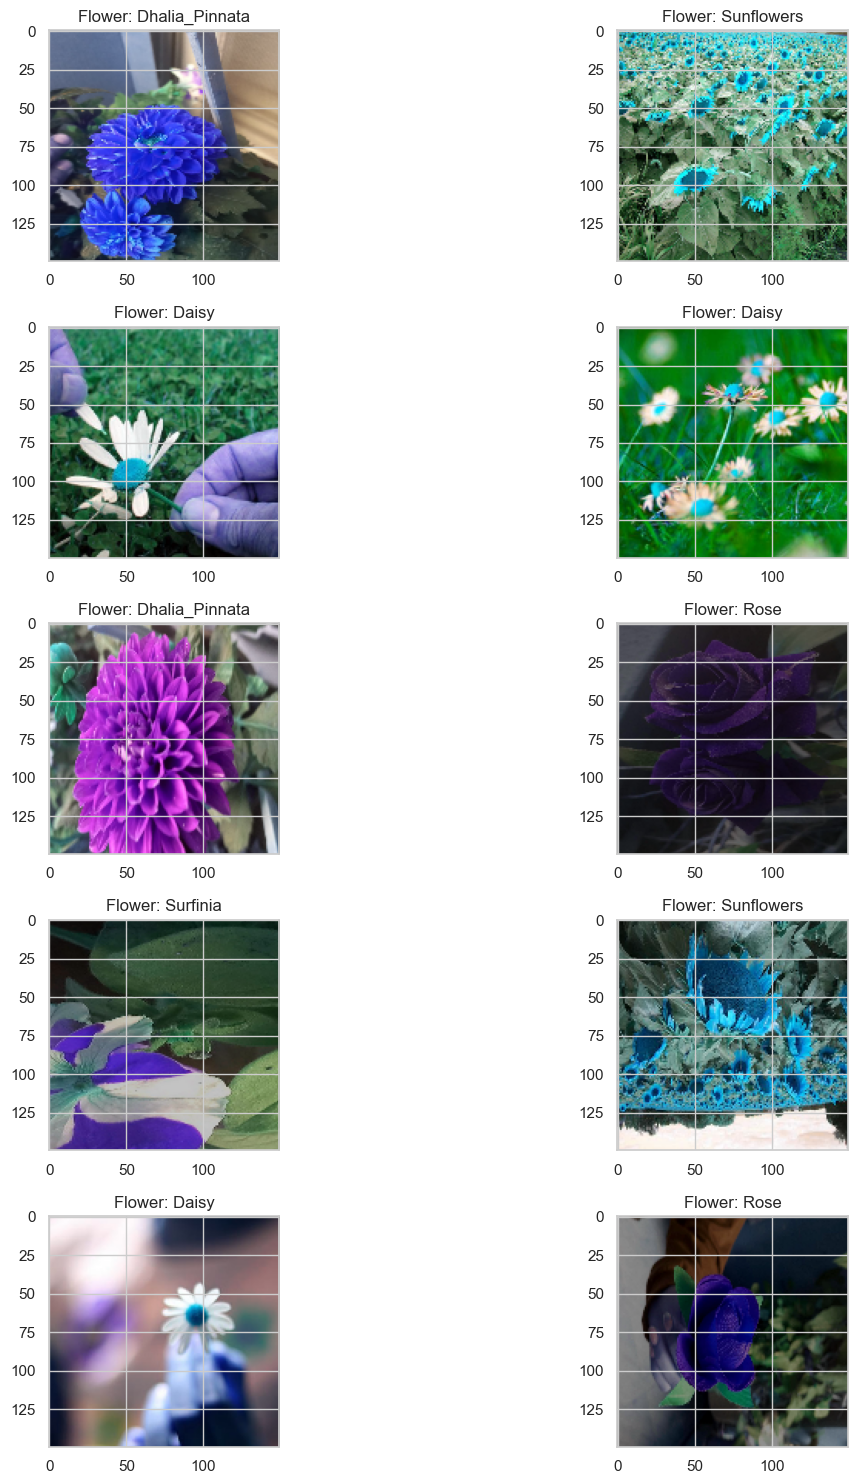

In [39]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])

plt.tight_layout()


## 2.3 ) Label Encoding the Y array (i.e. Daisy->0, Rose->1 etc...) & then One Hot Encoding

In [8]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,7)
X=np.array(X)
X=X/255

## 2.4 ) Splitting into Training and Validation Sets

In [9]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)


## 2.5 ) Setting the Random Seeds

In [10]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

<a id="content3"></a>
## 3 ) Modelling

## 3.1 ) Building the ConvNet Model

In [18]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

## 3.2 ) Using a LR Annealer

In [24]:
batch_size=32
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

## 3.3 ) Data Augmentation to prevent Overfitting

In [36]:


datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images 


datagen.fit(x_train)

MemoryError: Unable to allocate 2.53 GiB for an array with shape (10064, 150, 150, 3) and data type float32

## 3.4 ) Compiling the Keras Model & Summary

In [ ]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [124]:
model.summary()
#model.save = ("my_flower_detection.model")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 96)        0

## 3.5 ) Fitting on the Training set and making predcitons on the Validation set

In [ ]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

<a id="content4"></a>
## 4 ) Evaluating the Model Performance

In [ ]:
import matplotlib.pyplot as plt

plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


<a id="content5"></a>
## 5 ) Visualizing Predictons on the Validation Set

In [121]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

6/6 [==============================] - 3s 193ms/step


In [ ]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

#### CORRECTLY CLASSIFIED FLOWER IMAGES

In [ ]:
count = 0
fig, ax = plt.subplots(4, 2)
fig.set_size_inches(15, 15)

for i in range(4):
    for j in range(2):
        if count < len(prop_class):  # Check if count is within the range of prop_class
            ax[i, j].imshow(x_test[prop_class[count]])
            y_pred = pred_digits[prop_class[count]]
            pred_label = le.inverse_transform([y_pred])[0]
            
            ax[i, j].set_title(f"Predicted Flower: {pred_label}")
            plt.tight_layout()
            count += 1


#### MISCLASSIFIED IMAGES OF FLOWERS

In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count = 0
fig, ax = plt.subplots(4, 2)
fig.set_size_inches(15, 15)

for i in range(4):
    for j in range(2):
        if count < len(mis_class):  # Check if count is within the range of mis_class
            ax[i, j].imshow(x_test[mis_class[count]])
            y_pred = int(pred_digits[mis_class[count]])  # Convert y_pred to integer
            y_true = int(y_test[mis_class[count]])  # Convert y_true to integer
            
            pred_label = le.inverse_transform([y_pred])[0]
            true_label = le.inverse_transform([y_true])[0]
            
            ax[i, j].set_title(f"Predicted Flower: {pred_label}\nActual Flower: {true_label}")
            plt.tight_layout()
            count += 1


In [140]:
from keras.models import load_model, save_model

# Assuming 'model' is your Keras model
# Save the model with .model extension
save_model(model, 'my_flower_detection_model.h5')  # or .model, whichever extension you prefer


#  THE END.

## [ Please upvote / star if you liked it. ]